In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

# Stock data: NETFLIX 

In [207]:
data = yf.download("NFLX", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [8]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,373.109985,381.359985,364.500000,381.049988,381.049988,6997900
2020-03-03,381.029999,393.519989,367.399994,368.769989,368.769989,8364600
2020-03-04,377.769989,384.010010,370.510010,383.790009,383.790009,5487300
2020-03-05,381.000000,391.399994,368.640015,372.779999,372.779999,8747000
2020-03-06,367.700012,371.309998,356.850006,368.970001,368.970001,8147200
2020-03-09,343.859985,357.470001,341.720001,346.489990,346.489990,7405500
2020-03-10,356.429993,364.540009,347.850006,364.130005,364.130005,7604400
2020-03-11,358.920013,362.980011,344.790009,349.920013,349.920013,6036000
2020-03-12,326.500000,335.720001,307.320007,315.250000,315.250000,12071600


In [9]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,556.940002,561.250000,550.849976,556.520020,556.520020,2195900
2021-02-16,557.289978,563.630005,552.729980,557.280029,557.280029,2624100
2021-02-17,550.989990,555.250000,543.030029,551.340027,551.340027,2069600
2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200
2021-02-19,548.000000,548.989990,538.809998,540.219971,540.219971,2841500
2021-02-22,534.989990,541.789978,530.789978,533.780029,533.780029,3078600
2021-02-23,525.000000,548.539978,518.280029,546.150024,546.150024,4136500
2021-02-24,539.799988,556.849976,539.070007,553.409973,553.409973,3245000
2021-02-25,550.270020,556.479980,535.750000,546.700012,546.700012,4252900


# Summary Statistics

In [15]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,474.87,483.26,466.42,475.16,475.16,6662995.22
std,59.62,58.90,59.24,59.05,59.05,4173867.37
min,302.40,322.90,290.25,298.84,298.84,1144000.00
25%,436.16,444.33,430.40,435.84,435.84,4156950.00
50%,488.50,494.92,481.27,488.24,488.24,5602500.00
75%,516.76,525.10,504.43,519.45,519.45,7823450.00
max,582.45,593.29,570.40,586.34,586.34,32637500.00


# ADJ Price movement diagram

In [13]:
ADJ =  data['Adj Close']

Text(0.5, 1.0, 'Adjusted Close Price')

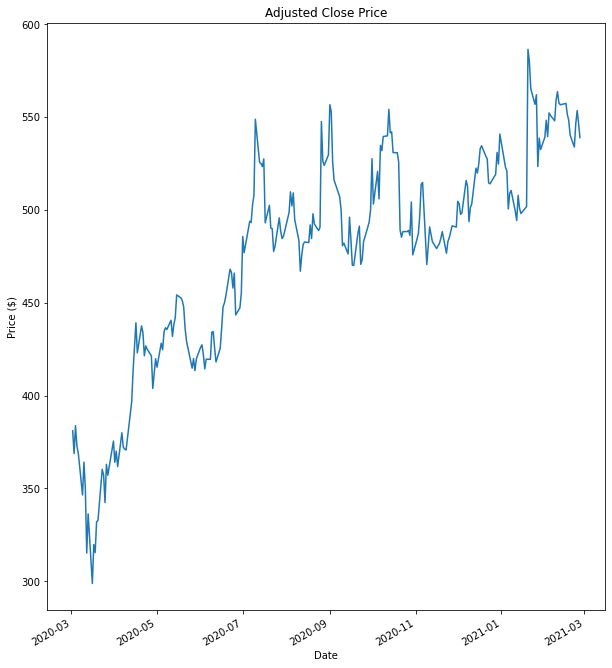

In [10]:
ADJ.plot(figsize=(10, 12), subplots=True)
plt.ylabel('Price ($)')
plt.title('Adjusted Close Price')

# Close Price movement diagram

In [12]:
CLS = data['Close']

Text(0.5, 1.0, 'Close Price')

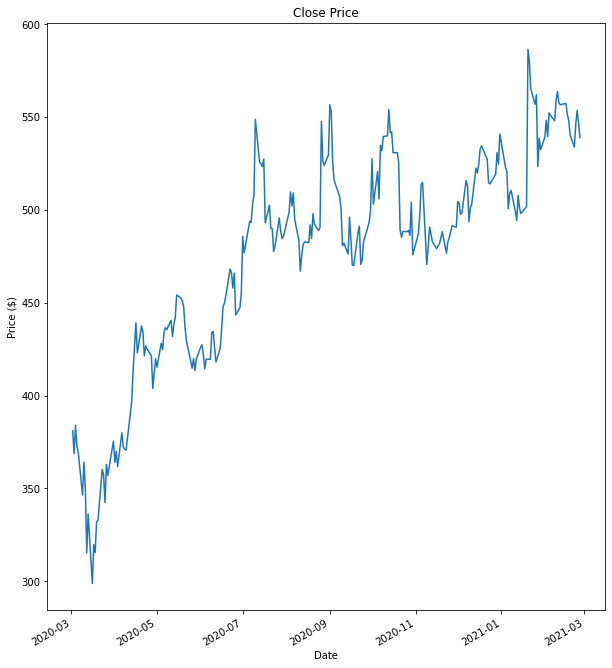

In [14]:
CLS.plot(figsize=(10, 12), subplots=True)
plt.ylabel('Price ($)')
plt.title('Close Price')


# Annualised volatility (12M)

In [16]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [17]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 48.53 %


# Annualised volatility (6M)

In [18]:
vol = np.sqrt(126) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.31 %


# BINOMIAL TREE MODEL

S0: stock spot price,
K: strike price,
T: maturity,
N number of time steps,
sigma: diffusion coefficient or volatility,
r: risk free rate

In [6]:
dT = float(T) / N                   # delta T
u = np.exp(sigma * np.sqrt(dT))     # up factor 
d = 1.0 / u                         # down factor
p = (np.exp(r*dT) - d) / (u - d)    # risk free up probability
q = 1.0 - p                         # risk free down probability

In [22]:
# PRICE TREE
price_tree = np.zeros((N + 1, N + 1))
price_tree[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        price_tree[i, t] = price_tree[i, t-1] * u
        price_tree[i+1, t] = price_tree[i, t-1] * d
    z += 1             

In [13]:
S0 = 535.0
K = 580.0
N = 3
sigma = 0.4853     
r = 0.017
T = 1.0

In [14]:
price_tree

array([[ 535.        ,  708.00760314,  936.96217963, 1239.95578885],
       [   0.        ,  404.26825747,  535.        ,  708.00760314],
       [   0.        ,    0.        ,  305.48191402,  404.26825747],
       [   0.        ,    0.        ,    0.        ,  230.83484312]])

In [64]:
# Binary_option_payoff
payoff = np.where((price_tree != 0) & (price_tree < K),1.0,0.0 )
payoff

array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [105]:
# OPTION VALUE AT EARLIER NODES
for j in range(N-1, -1, -1):
        for i in range(j+1):
            Value[i,j] = np.exp(-r*dT) * (p * payoff[i,j + 1] + q * payoff[i + 1,j + 1])

In [106]:
Value

array([[  0.55642085,   0.55642085,   0.        ,   0.        ],
       [  0.        ,   0.99434936,   0.55642085,   0.        ],
       [  0.        ,   0.        ,   0.99434936, 175.73174253],
       [  0.        ,   0.        ,   0.        , 349.16515688]])

In [107]:
print('Value of binary put option ', str( Value[0,0]))

Value of binary put option  0.5564208538707269


# BLACK-SCHOLES MODEL

In [111]:
def put_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: fixed cash value
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
#CASH OR NOTHING BINARY OPTION VALUE 
    option_value = payoff * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [112]:
put_option_bs(535, 580, 1, 0.017, 0.4853,1.0)

0.6349250329627212

# GREEKS OF BINARY PUT OPTION

    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [161]:
def delta(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    delta = (- np.exp(-q * T))*si.norm.pdf(d2, 0.0, 1.0) / (S * vol * np.sqrt(T))
    return delta

In [167]:
delta(535, 580, 1, 0.017, 0.01, 0.4583)

-0.0014928603950462404

In [169]:
S = np.linspace(500,700,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    
    Delta_Put [i] = delta(S[i], 580, 1, 0.017, 0.01, 0.4853)

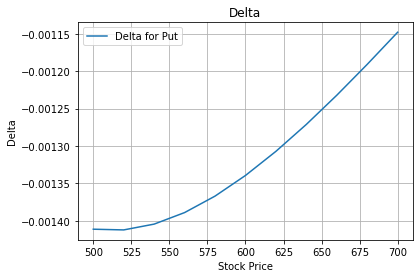

In [170]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [174]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    gamma = np.exp(-q * T) * si.norm.pdf(d2, 0.0, 1.0) * d1 / ((S**2) * (vol**2) * np.sqrt(T))
    return gamma

In [173]:
gamma(535, 580, 1, 0.017, 0.01, 0.4583)

4.152676636363529e-07

In [176]:
S = np.linspace(500,700,11)
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    
    Gamma_Put [i] = gamma(S[i], 580, 1, 0.017, 0.01, 0.4853)

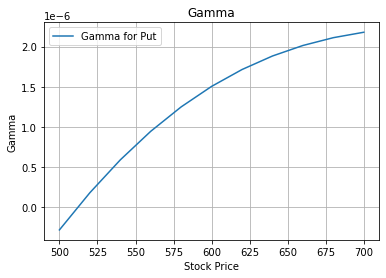

In [177]:
fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Vega

Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [178]:
def vega(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    vega = np.exp(-q * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / vol
    
    return vega

In [179]:
vega(535, 580, 1, 0.017,0.01, 0.4583)

0.0544735320532436

In [180]:
vol = np.linspace(0.15,0.55,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(535, 580, 1, 0.017, 0.01, vol[i])

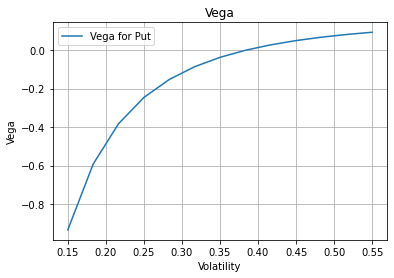

In [181]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [182]:
def rho(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    rho = np.exp(-q * T) * ((-np.sqrt(T) * si.norm.pdf(d2, 0.0, 1.0)) / vol - (T * si.norm.cdf(-d2, 0.0, 1.0)))
    return rho

In [183]:
rho(535, 580, 1, 0.017, 0.01, 0.4583)

-1.443962183018881

In [184]:
r = np.linspace(0,0.1,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    
    Rho_Put [i] = rho(535, 580, 1, r[i], 0.01, 0.4583)

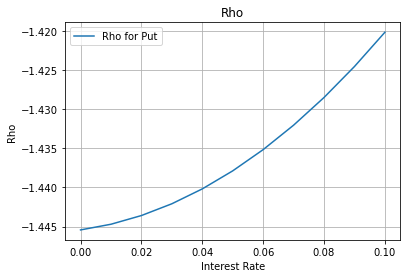

In [185]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [202]:
def theta(S, K, T, r, q, vol):
    
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    theta = np.exp(-q * T) * ((-si.norm.pdf(d2, 0.0, 1.0) / (2 * T * vol * np.sqrt(T)) * (np.log(S / K) - (r - q - 0.5 * vol ** 2) * T)) + q * si.norm.cdf(-d2, 0.0, 1.0))
    return theta

In [203]:
theta(535, 580, 1, 0.017, 0.01, 0.4583)

-0.00043902897386117367

In [204]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(r)):
    Theta_Put [i] = theta(535, 580, T[i], 0.017, 0.01, 0.4583)

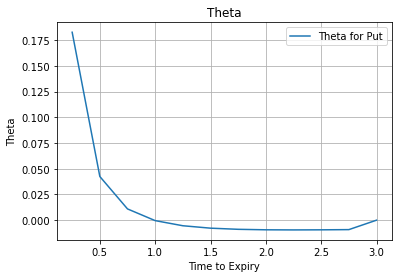

In [205]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])